# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'dataset/train.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

valid=dict()

## Load sign names

In [2]:
import csv
class_names=dict()
with open('signnames.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header_skipped=False
    for row in spamreader:
        if not header_skipped:
            header_skipped=True
            continue
        class_names[int(row[0])]=row[1]
for key,val in class_names.items():
    print(key,val)

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vechiles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vechiles
16 Vechiles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vechiles over 3.5 metric tons


## Imports

In [3]:
#importing some useful packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from tqdm import tqdm
%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
### Replace each question mark with the appropriate value.

# TODO: number of training examples
n_train = len(train['features'])

# TODO: number of testing examples
n_test = len(test['features'])

# TODO: what's the shape of an image?
image_shape = train['features'][0].shape

# TODO: how many classes are in the dataset
n_classes = len(set(train['labels']))
labels_shape = train['labels'].shape

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Labels data shape =", labels_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Labels data shape = (39209,)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the **first step** of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

## Visualize data

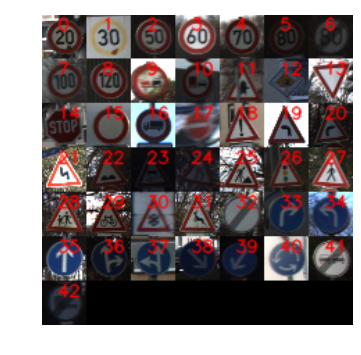

In [6]:
image_every_class=dict()
for im,cl in zip(train['features'],train['labels']):
    image_every_class[cl]=im

image_every_class=list(image_every_class.values())

cols=7
rows=7

for y in range(0,1+int(len(image_every_class)/cols)):
    if y==6: #last row
        img_last=image_every_class[y*cols:(y+1)*cols][0]
        img_empty=np.zeros((32, 192, 3))
        img_row=np.concatenate(image_every_class[y*cols:(y+1)*cols]*7,axis=1)
        img_row[:,32:]=0
    else:
        img_row=np.concatenate(image_every_class[y*cols:(y+1)*cols],axis=1)
    if y==0:
        image=img_row
    else:
        image=np.concatenate((image,img_row),axis=0)        

for y in range(0,1+int(len(image_every_class)/cols)):
    for x in range(cols):
        if(x+y*cols<n_classes):
            cv2.putText(image,str(x+y*cols),(11+x*32,11+y*32), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,0,0),1,cv2.LINE_AA)

plt.axis('off');
plt.imshow(image);


## Normalize images

In [7]:
def normalize(image):
    _min=image.min()
    _max=image.max()
    img = ((image-_min) /(_max-_min))*0.8+0.1
    return img

train['features'] = np.array([normalize(im) for im in train['features']])
test['features'] = np.array([normalize(im) for im in test['features']])

### RGB to HSV (disabled)

In [8]:
#RGB to HSV
# pbar = tqdm(range(len(train['features'])), desc='RGB to HSV', unit='images')
# for i in pbar:
#     train['features'][i]=matplotlib.colors.rgb_to_hsv(train['features'][i])

## Normalized data

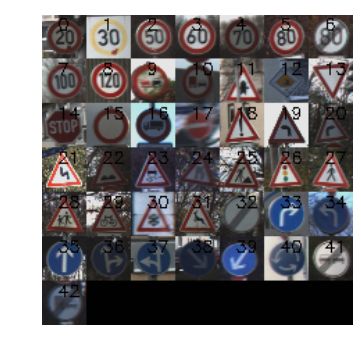

In [9]:
image_every_class=dict()
for im,cl in zip(train['features'],train['labels']):
    image_every_class[cl]=im

image_every_class=list(image_every_class.values())

cols=7
rows=7

for y in range(0,1+int(len(image_every_class)/cols)):
    if y==6: #last row
        img_last=image_every_class[y*cols:(y+1)*cols][0]
        img_empty=np.zeros((32, 192, 3))
        img_empty.fill(255)
        img_row=np.concatenate(image_every_class[y*cols:(y+1)*cols]*7,axis=1)
        img_row[:,32:]=255
    else:
        img_row=np.concatenate(image_every_class[y*cols:(y+1)*cols],axis=1)
    if y==0:
        image=img_row
    else:
        image=np.concatenate((image,img_row),axis=0)
        
for y in range(0,1+int(len(image_every_class)/cols)):
    for x in range(cols):
        if(x+y*cols<n_classes):
            cv2.putText(image,str(x+y*cols),(11+x*32,11+y*32), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,0,0),1,cv2.LINE_AA)

plt.axis('off');
plt.imshow(image);


### Number of images

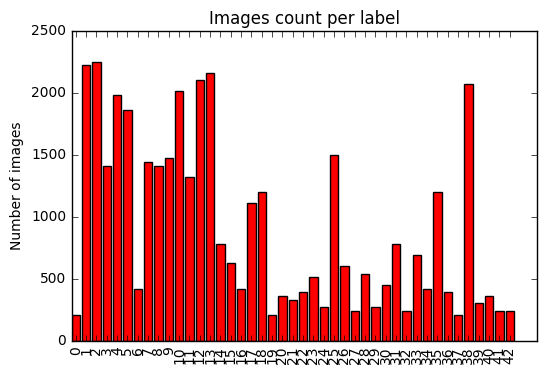

In [10]:
fig, ax = plt.subplots();
count=[0]*43;
for l in train['labels']:
    count[l]=count[l]+1;
width=0.4;
ind = np.arange(len(count));
ax.bar(ind,count,color='r');
ax.set_ylabel('Number of images');
ax.set_title('Images count per label');
ax.set_xticks(ind+width);
ax.set_xticklabels([str(x) for x in list(range(len(count)))], rotation=90,ha='center');

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I have normalized images in preprocessing step to equalize luminance. I have used that technique to enhance details of images. Too dark or too bright images with low contrast can lead to complicate classification.
I have used RGB data as input for my net, because I don't wont to lose color information.
Instead of RGB the HSV colorspace can be used, switching to hsv can improve accuracy.

**Comparison RGB vs HSV**

I have made simple test with switching to HSV but haven't seen much improvement.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

### Generating data

I have used Vivek Yadav's transform image function. It applies random affine transformation using angle,shear and translation ranges.
https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3#.332anihuv

In [11]:
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

## Example of generated data

Here is sample what generated images look like

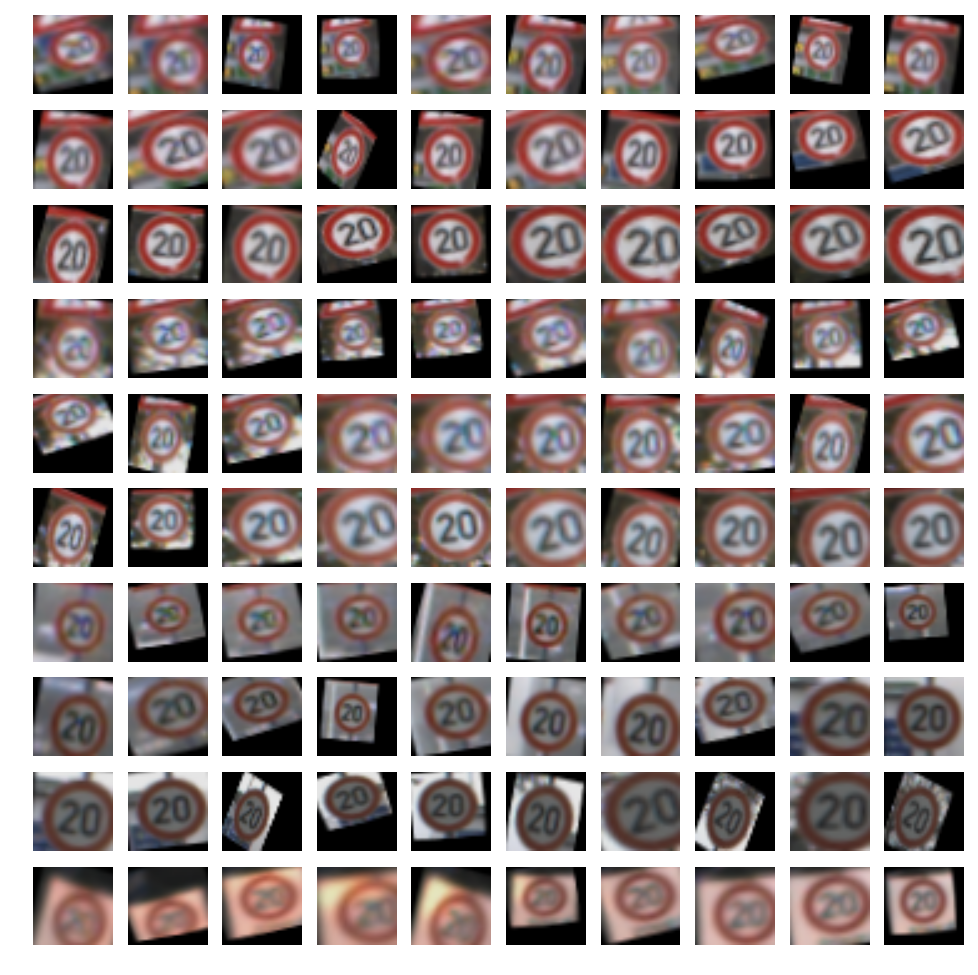

In [12]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(train['features'][i],20,10,1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

## Generating data for training

In [13]:
MINIMAL_IMAGES_COUNT=600

count=[0]*43;
for l in train['labels']:
    count[l]=count[l]+1;

pbar = tqdm(range(len(train['features'])), desc='Image', unit='images')

for i in pbar:
    im=train['features'][i]
    cl=train['labels'][i]
    if count[cl]<MINIMAL_IMAGES_COUNT:
        for i in range(10):
            img = transform_image(im,20,10,1)
            img=img.reshape(1,32,32,3)
            train['features']=np.concatenate((train['features'],img),axis=0)
            train['labels']=np.concatenate((train['labels'],[cl]))
            count[cl]=count[cl]+1


Image: 100%|██████████| 39209/39209 [17:59<00:00, 36.31images/s]


## Images count per label after adding generated images

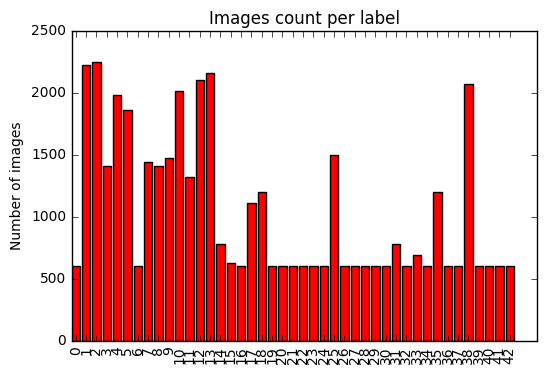

In [14]:
fig, ax = plt.subplots();
count=[0]*43;
for l in train['labels']:
    count[l]=count[l]+1;
width=0.4;
ind = np.arange(len(count));
ax.bar(ind,count,color='r');
ax.set_ylabel('Number of images');
ax.set_title('Images count per label');
ax.set_xticks(ind+width);
ax.set_xticklabels([str(x) for x in list(range(len(count)))], rotation=90,ha='center');

## Convert labels to one hot encoding

In [15]:
labels_one_hot=np.zeros([train['labels'].shape[0],n_classes])
for i,l in enumerate(train['labels']):
    labels_one_hot[i][l]=1
train['labels']=labels_one_hot

labels_one_hot=np.zeros([test['labels'].shape[0],n_classes])
for i,l in enumerate(test['labels']):
    labels_one_hot[i][l]=1
test['labels']=labels_one_hot

## Split training data

In [16]:
from sklearn.model_selection import train_test_split
train['features'], valid['features'], train['labels'], valid['labels'] = train_test_split( train['features'], 
   train['labels'],
   test_size=0.2,
   random_state=122333)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Network parameters

In [17]:
layer_width = {
    'conv1': 32,
    'conv2': 128,
    'fc1': 1024,
    'fc2': 1024,
    'fc3': n_classes
}
filter_size=[3,3]
with tf.variable_scope('karol', reuse=False):
    weights = {
        'conv1': tf.get_variable("conv1w", shape=[filter_size[0], filter_size[1], image_shape[2], layer_width['conv1']], initializer=tf.contrib.layers.xavier_initializer()),
        'conv2': tf.get_variable("conv2w", shape=[filter_size[0], filter_size[1], layer_width['conv1'], layer_width['conv2']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc1':  tf.get_variable("fc1w", shape=[image_shape[0]*image_shape[1]*layer_width['conv2'], layer_width['fc1']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc2':  tf.get_variable("fc2w", shape=[layer_width['fc1'], layer_width['fc2']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc3':  tf.get_variable("fc3w", shape=[layer_width['fc2'], layer_width['fc3']], initializer=tf.contrib.layers.xavier_initializer())
    }

    biases = {
        'conv1': tf.get_variable("conv1b", shape=[layer_width['conv1']], initializer=tf.contrib.layers.xavier_initializer()),
        'conv2': tf.get_variable("conv2b", shape=[layer_width['conv2']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc1': tf.get_variable("fc1b", shape=[layer_width['fc1']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc2': tf.get_variable("fc2b", shape=[layer_width['fc2']], initializer=tf.contrib.layers.xavier_initializer()),
        'fc3': tf.get_variable("fc3b", shape=[layer_width['fc3']], initializer=tf.contrib.layers.xavier_initializer())
    }
for key,val in sorted(layer_width.items()):
    print("Layer %4s width is %s"%(key,val))
          
for key,val in sorted(weights.items()):
    print("Weights for %4s: %s"%(key,val))

Layer conv1 width is 32
Layer conv2 width is 128
Layer  fc1 width is 1024
Layer  fc2 width is 1024
Layer  fc3 width is 43
Weights for conv1: Tensor("karol/conv1w/read:0", shape=(3, 3, 3, 32), dtype=float32)
Weights for conv2: Tensor("karol/conv2w/read:0", shape=(3, 3, 32, 128), dtype=float32)
Weights for  fc1: Tensor("karol/fc1w/read:0", shape=(131072, 1024), dtype=float32)
Weights for  fc2: Tensor("karol/fc2w/read:0", shape=(1024, 1024), dtype=float32)
Weights for  fc3: Tensor("karol/fc3w/read:0", shape=(1024, 43), dtype=float32)


### Helper functions

In [18]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def fclayer(x,w,b):
    return tf.matmul(tf.contrib.layers.flatten(x), w) + b

### My network definition

In [19]:
def myNet(x):
    # conv layer
    net = conv2d(x,weights['conv1'],biases['conv1'])
    net = conv2d(net,weights['conv2'],biases['conv2'])

    # fully connected layers
    net = fclayer(net,weights['fc1'],biases['fc1'])
    net = tf.nn.relu(net)
    net = fclayer(net,weights['fc2'],biases['fc2'])
    net = tf.nn.relu(net)
    net = fclayer(net,weights['fc3'],biases['fc3'])

    return net


## Network graph

![Network graph](graph.png)


### Number of epochs, learning rate and batch size

In [20]:
EPOCHS = 50
BATCH_SIZE = 150
LEARNING_RATE = 0.0001

print("Number of epochs: ",EPOCHS)
print("Batch size: ",BATCH_SIZE)

Number of epochs:  50
Batch size:  150


### Input,output,loss and accuracy

In [21]:
x = tf.placeholder(tf.float32, shape=[None,image_shape[0],image_shape[1],image_shape[2]])
y = tf.placeholder(tf.float32)

net = myNet(x)

# Loss computation
prediction = tf.nn.softmax(net)
cross_entropy = -tf.reduce_sum(y * tf.log(prediction + 1e-6), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)

# Accuracy computation
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

## Training

In [22]:
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

batches = []
loss_epoch = []
train_acc_epoch = []
valid_acc_epoch = []
validation_accuracy = 0.0



init = tf.global_variables_initializer()

session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(init)

# Merge all the summaries and write them out to /tmp/mnist_logs (by default)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('/tmp/traffic-signs/train',
                                      session.graph)

# tf.global_variables_initializer().run()

batch_count = int(len(train['features']) / BATCH_SIZE)

for epoch in range(EPOCHS):
    batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch + 1, EPOCHS), unit='batches')

    for batch_i in batches_pbar:
        batch_start = batch_i * BATCH_SIZE
        batch_features = train['features'][batch_start:batch_start + BATCH_SIZE]
        batch_labels = train['labels'][batch_start:batch_start + BATCH_SIZE]

        _, l = session.run(
            [optimizer, loss],
            feed_dict={x: batch_features, y: batch_labels})
        
    training_accuracy = session.run(
        accuracy,
        feed_dict={x: batch_features, y: batch_labels}
    )
    idx = np.random.randint(len(valid['features']), size=int(BATCH_SIZE * .2))
    validation_accuracy = session.run(
        accuracy,
        feed_dict={x: valid['features'][idx,:], y: valid['labels'][idx,:]}
    )
    
    batches.append(len(batches))
    loss_epoch.append(l)
    train_acc_epoch.append(training_accuracy)
    valid_acc_epoch.append(validation_accuracy)



Epoch 50/50: 100%|██████████| 238/238 [00:44<00:00,  5.46batches/s]


### Results plots

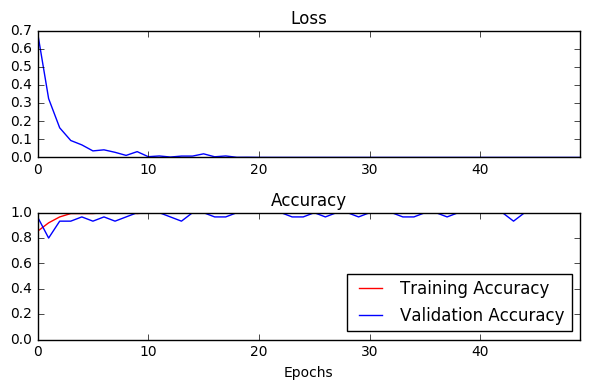

In [23]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_epoch)
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_epoch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_epoch, 'b', label='Validation Accuracy')
acc_plot.set_xlabel('Epochs')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

## Accuracy

In [24]:
def run_batch_accuracy(session, network, features, labels):
    batch_count = int(len(features) / BATCH_SIZE)
    accuracy = 0

    for i in range(batch_count):
        batch_start = i * BATCH_SIZE
        accuracy += session.run(
            network,
            feed_dict={
                x: features[batch_start:batch_start + BATCH_SIZE],
                y: labels[batch_start:batch_start + BATCH_SIZE]
            }
        )

    return accuracy / batch_count

### Validation data

In [25]:
validation_accuracy = run_batch_accuracy(session, accuracy, valid['features'], valid['labels'])
print('Final validation accuracy: ', validation_accuracy)

Final validation accuracy:  0.988361585948


### Test data

In [26]:
test_accuracy = run_batch_accuracy(session, accuracy, test['features'], test['labels'])
print('Final test accuracy: ', test_accuracy)

Final test accuracy:  0.903015875391


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

#### Optimizer

As optimizer I have used AdamOptimizer, because
After testing learning rate from 0.00001 to 0.01 I choosed learning rate = 0.0001.

#### Batch size

I choosed batch size 150.

#### Epochs

I was experimenting with the number of epochs. If I increase learning rate, I can use about 20 epochs, but increasing learning rate can lead to oscillation around local minima or missing it at all.
Finally I choosed 50 epochs.

#### Hyperparameters

I have started will reduced number of hyperparameters. Accuracy of such model was very high on training dataset, but on validation set it was oscilating between 80% and 100% during epochs.
The net was unable to generalize - I have made test with my photos and results were pretty bad.
Increasing number of parameters reduced oscilations of validation accuracy to 95%-100% and even better.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

*All computations are made on a laptop with GTX980M (laptop edition).*

I have tested multiple nets, starting from LeNet. I have tested also Mehdi Sqalli's network with single convolution and 3 fully connected layers. It was slow for train (two fc with 1024 width both), so I reduced layers width. This approach helped a lot in terms of speed, but decreased the accuracy on validation dataset.

Here are some configurations:
- conv, conv, fc, fc
- conv, fc, fc
- conv, fc, fc, fc
- conv, conv, fc, fc, fc

Last two were tested with multiple sets of parameters to find best speed/accuracy solution, because we are trying to use it in a car and do not want to wait several seconds for prediction...

Test dataset showed that decreasing number of parameters can lead to bad results.
I have increased number of parameters for my final net. Training speed is around 1000 images/s

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

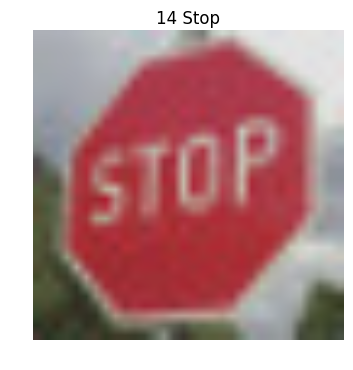

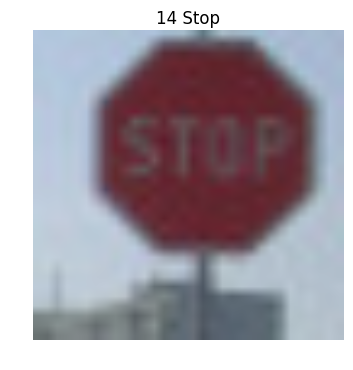

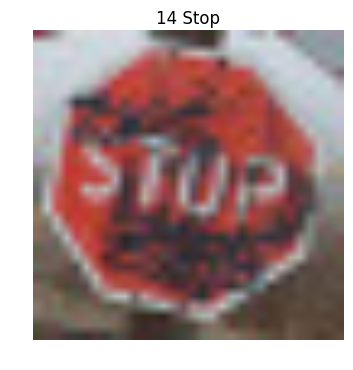

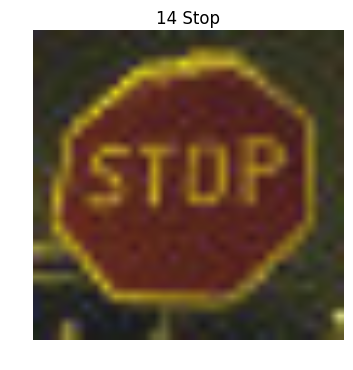

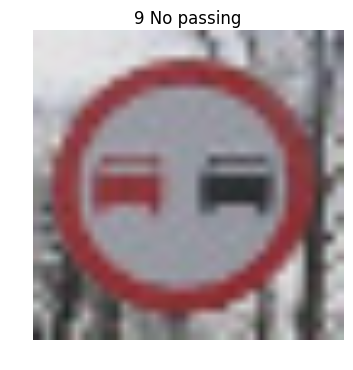

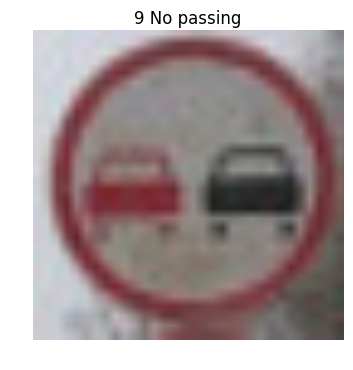

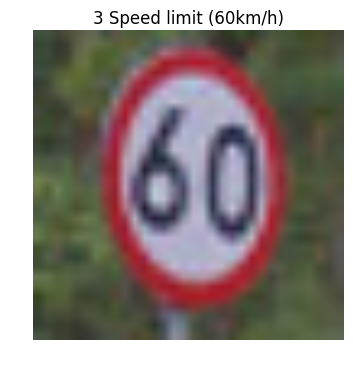

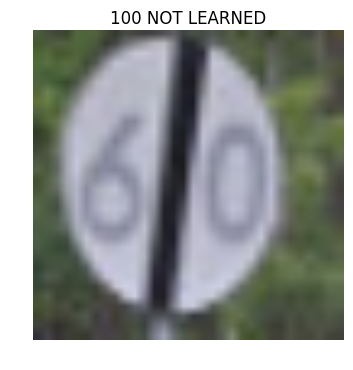

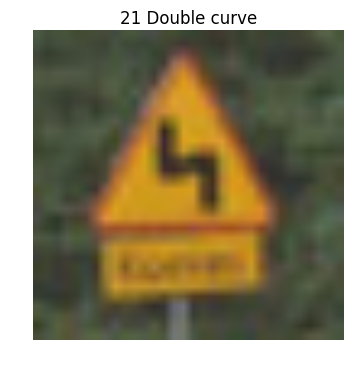

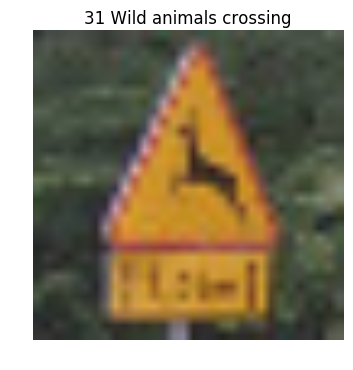

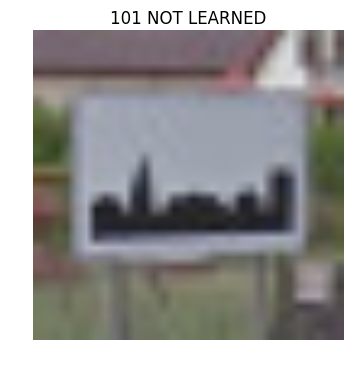

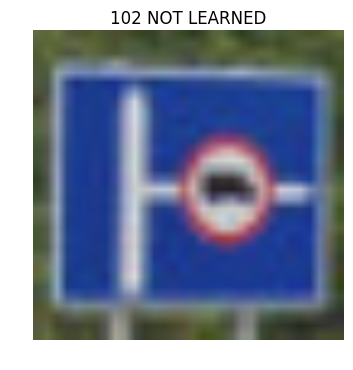

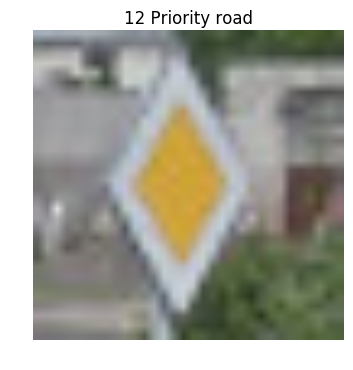

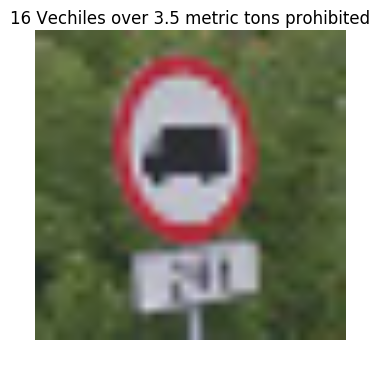

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from glob import glob
from scipy import misc

new_images_files=glob('test-photos/*')
new_images=[]
new_images_cl=[]
for fn in sorted(new_images_files):
    cl=int(fn.split('_')[1].split('.')[0])
#     print("File %-25s class %3d"%(fn,cl))
    im=misc.imread(fn)
    #preprocess
    im=normalize(im)

    new_images.append(im)
    new_images_cl.append(cl)
    f=plt.figure()
    splt = f.add_subplot(111)
    if cl<n_classes:
        splt.set_title(str(cl) + " " + class_names[cl])
    else:
        splt.set_title(str(cl)+" NOT LEARNED")
    splt.imshow(im)
    splt.axis('off')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [28]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

new_predictions = session.run(prediction, feed_dict={x: new_images})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [29]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print(new_predictions)

[[  4.37750400e-12   1.12544740e-06   4.32160224e-10   3.95442356e-07
    2.35406119e-20   1.45239601e-05   1.35376327e-21   2.97594891e-12
    2.48569498e-10   3.68852184e-08   3.18532606e-15   7.18399189e-16
    1.32673060e-18   1.27237300e-07   9.99958634e-01   3.26461830e-10
    4.15918927e-15   1.56654642e-05   2.37209111e-19   5.40694605e-21
    5.56167623e-18   3.93700914e-18   4.29063712e-18   5.09324140e-16
    2.02871296e-23   1.36237961e-12   7.97041129e-18   1.01819184e-16
    2.66410701e-18   9.50334288e-06   7.40867214e-16   4.03027389e-10
    6.73684511e-18   2.15630640e-34   8.26384114e-30   4.53582695e-26
    2.23992933e-27   0.00000000e+00   8.04461991e-30   0.00000000e+00
    1.98464542e-31   2.83721541e-25   7.63579935e-25]
 [  7.34943703e-11   2.24631158e-09   1.00717909e-14   1.60818757e-07
    7.80084134e-27   2.32548473e-06   6.34835717e-12   5.78967629e-09
    1.05001084e-25   1.19265394e-06   1.03724629e-01   6.12486266e-02
    8.34935784e-01   8.89000057e-06 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

cl    input class name                  cl         prediction 1    %  cl         prediction 2    %

14    Stop                              14                 Stop 100%  17             No entry   0% [ True False]
14    Stop                              12        Priority road  83%  10  ver 3.5 metric tons  10% [False False]
14    Stop                              14                 Stop  95%  17             No entry   5% [ True False]
14    Stop                              14                 Stop 100%  29    Bicycles crossing   0% [ True False]
9     No passing                         9           No passing 100%  41    End of no passing   0% [ True False]
9     No passing                         9           No passing  96%  16  ric tons prohibited   4% [ True False]
3     Speed limit (60km/h)               0  peed limit (20km/h)  96%   1  peed limit (30km/h)   3% [False False]
100   NOT LEARNED                       37  Go straight or left  97%  40  oundabout mandatory   3% [False Fal

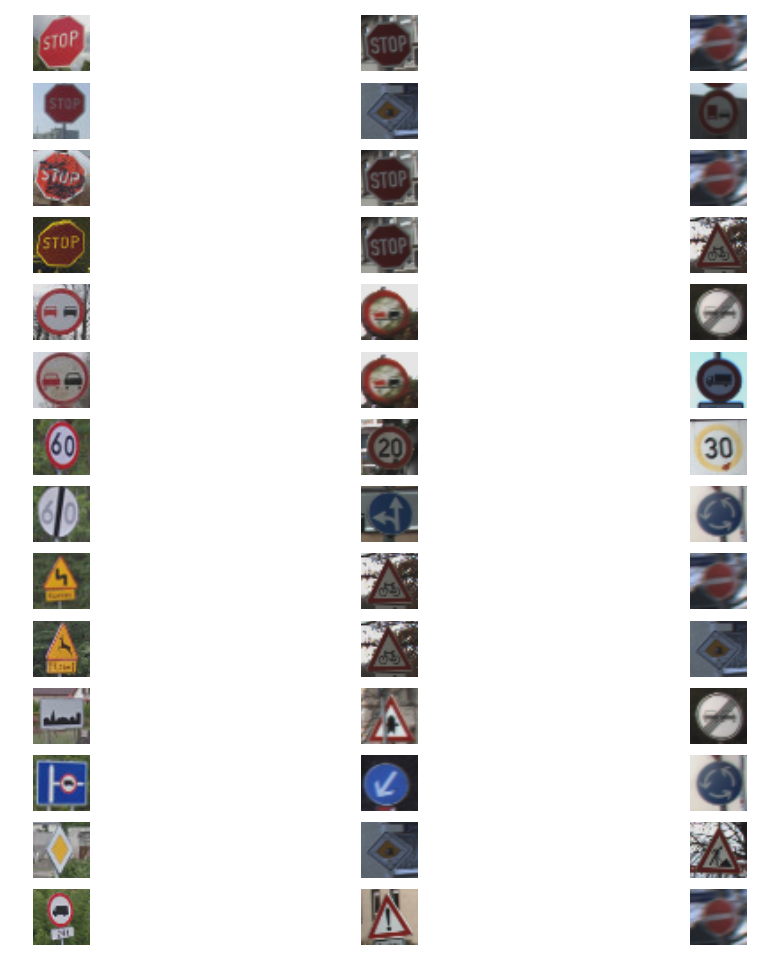

Good / new trained / all new = 6 /11 / 14
Additional dataset accuracy = 54.5%


In [30]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec( len(new_images),3)
plt.figure(figsize=(12,12))

predictions=list(session.run(tf.nn.top_k(prediction, 2), feed_dict={x: new_images}))

# print('\n'.join(["%.0f%%  %.0f%%"%(100.0*x[0],100.0*x[1]) for x in predictions[0]]))

index=0

def cl_to_s(cl):
    if cl<n_classes:
        return class_names[cl]
    else:
        return "NOT LEARNED"

trained_new_count=0
good_pred_new_count=0

print("%-5s %-30s    %2s %20s %3s%%  %2s %20s %3s%%\n"%("cl","input class name","cl","prediction 1","","cl","prediction 2",""))
for i,(ref,perc,pre) in enumerate(zip(new_images_cl,predictions[0],predictions[1])):
    print("%-5d %-30s    %2d %20s %3.0f%%  %2d %20s %3.0f%% %s"%(ref,cl_to_s(ref)[-29:],pre[0],cl_to_s(pre[0])[-19:],100.0*perc[0],pre[1],cl_to_s(pre[1])[-19:],100.0*perc[1],ref==pre))
    
    if ref<n_classes:
        trained_new_count=trained_new_count+1
    if ref == pre[0]:
        good_pred_new_count=good_pred_new_count+1
    
    ax1 = plt.subplot(gs1[index])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(len(new_images),3,3*i+0+1)
    plt.imshow(new_images[i])
    plt.axis('off')
    
    index=index+1
    
    ax1 = plt.subplot(gs1[index])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(len(new_images),3,3*i+1+1)
    plt.imshow(image_every_class[pre[0]])
    plt.axis('off')
    
    index=index+1
    
    ax1 = plt.subplot(gs1[index])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(len(new_images),3,3*i+2+1)
    plt.imshow(image_every_class[pre[1]])
    plt.axis('off')
    
    index=index+1
    
plt.show()
print("Good / new trained / all new = %d /%d / %d"%(good_pred_new_count,trained_new_count,len(new_images)))
print("Additional dataset accuracy = %.1f%%"%(100.0*good_pred_new_count/trained_new_count))

## Comment on results

I have used 4 different images of stop sign: easy, low-contrast, vandalised, night. Idea was to check if net will not fail on a simple example (first image) and to check harder ones. Image 2 is a low contrast sign with high contrast backgroung and it was to hard to predict in top 2 predictions.
Image 3, the vandalised one, I thought it will fail, but net predicted it with 95% accuracy.
Image 4 was easy to predict (100% for stop).
Image -3 (cl 102) includes sign with class 16 so I was hoping for bad prediction as 16, but net concentrated on blue color in both predictions.
I am suprised that double curve sign (class 21) is not recognised. I thougt it will be ok, I have also second version with first right then left - mirrored sign.
I have added some not trained signs to check results.
I was testing using polish signs which are different in colors (yellow triangle with red border instead of white).

### Accuracy comparison

The accuracy on this extra test set was 54.5% including only trained signs. For comparison it was 98.8% on validation set and 90.3% on test set. It is hard to say about accuracy statistics with such small set (11 images)
The reasons such bad result were:
- low contrast, and vandalised stop sign
- speed limit 60 - it is hard for the net to determine the value on these similar signs
- yellow background on two warning signs
- small size of "Vechiles over 3.5 metric tons prohibited" sign

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.